In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_excel('SulpakDatasets.xlsx')
data

,Name,opSystem,countSIMcard,display,ram,camera,fronfCamera,NFC,product_availability,newPrice
0,Смартфон Samsung Galaxy A73 8/256GB Green,Android,2,"6,7″ - 17,02 см",256,108 Mpx + 12 Mpx + 5 Mpx + 5 Mpx,32 Mpx,Да,На витрине,279 890
1,Смартфон Apple iPhone 14 Pro Max 6/256GB Gold,iOS 16,1,"6,7″ - 17,02 см",256,48 Mpx + 12 Mpx + 12 Mpx,12 Mpx,Да,Есть в наличии,839 990
2,Смартфон Apple iPhone 14 Pro Max 6/128GB Silver,iOS 16,1,"6,7″ - 17,02 см",128,48 Mpx + 12 Mpx + 12 Mpx,12 Mpx,Да,Есть в наличии,769 990
3,Смартфон Apple iPhone 14 Pro Max 6/256GB Space...,iOS 16,1,"6,7″ - 17,02 см",256,48 Mpx + 12 Mpx + 12 Mpx,12 Mpx,Да,Есть в наличии,839 990
4,Смартфон Apple iPhone 11 64GB Black Slim Box,iOS 13,1,"6,1″ - 15,49 см",64,12 Mpx + 12 Mpx,12 Mpx,Да,Есть в наличии,279 990
...,...,...,...,...,...,...,...,...,...,...
676,Смартфон Motorola G52 6/128GB Glacier Blue,Android 12,2,"6,6″ - 16,76 см",128,50 Mpx + 8 Mpx + 2 Mpx,16 Mpx,Да,Есть в наличии,\n\n139 990
677,Смартфон Motorola Edge E30 Fusion 12/256GB Cos...,Android 12,2,"6,55″ - 16,64 см",256,50 Mpx + 13 Mpx,32 Mpx,Да,Есть в наличии,\n\n349 990
678,Смартфон Motorola G42 4/128GB Atlantic Green,Android 12,2,"6,5″ - 16,51 см",128,50 Mpx + 8 Mpx + 2 Mpx,16 Mpx,Да,Есть в наличии,\n\n119 990
679,Смартфон Motorola Edge E30 Ultra 12/256GB Star...,Android 12,2,"6,67″ - 16,94 см",256,200 Mpx + 50 Mpx + 12 Mpx,60 Mpx,Да,Есть в наличии,\n\n499 990


In [3]:
data["newPrice"]=data["newPrice"].apply(lambda x: x.replace(' ', '').replace('от', '')).astype('int')

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data.Name=le.fit_transform(data.Name)
data.opSystem=le.fit_transform(data.opSystem)
data.display=le.fit_transform(data.display)
data.camera=le.fit_transform(data.camera)
data.fronfCamera=le.fit_transform(data.fronfCamera)
data.NFC=le.fit_transform(data.NFC)
data.product_availability=le.fit_transform(data.product_availability)

In [5]:
dataset=data.values
dataset

array([[   401,      0,      2, ...,      0,      1, 279890],
       [   168,     31,      1, ...,      0,      0, 839990],
       [   162,     31,      1, ...,      0,      0, 769990],
       ...,
       [   254,      3,      2, ...,      0,      0, 119990],
       [   251,      3,      2, ...,      0,      0, 499990],
       [   249,      3,      2, ...,      0,      0, 349990]], dtype=int64)

In [6]:
X=dataset[:,0:9]   #[0;9)
Y=dataset[:,9]  #9

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
min_max_scaler=MinMaxScaler()
X_scale=min_max_scaler.fit_transform(X)
X_scale

array([[0.59850746, 0.        , 1.        , ..., 0.4375    , 0.        ,
        0.33333333],
       [0.25074627, 0.96875   , 0.        , ..., 0.125     , 0.        ,
        0.        ],
       [0.24179104, 0.96875   , 0.        , ..., 0.125     , 0.        ,
        0.        ],
       ...,
       [0.37910448, 0.09375   , 1.        , ..., 0.3125    , 0.        ,
        0.        ],
       [0.37462687, 0.09375   , 1.        , ..., 0.8125    , 0.        ,
        0.        ],
       [0.37164179, 0.09375   , 1.        , ..., 0.4375    , 0.        ,
        0.        ]])

In [9]:
Y = Y.reshape(-1, 1)
Y_scale=min_max_scaler.fit_transform(Y)
Y_scale

array([[0.23460138],
       [0.74489749],
       [0.68112187],
       [0.74489749],
       [0.23469248],
       [0.2711357 ],
       [0.2711357 ],
       [0.23469248],
       [0.12536284],
       [0.06158721],
       [0.12536284],
       [0.36224374],
       [0.32580052],
       [0.26202489],
       [0.80867312],
       [0.12536284],
       [0.93622437],
       [0.80867312],
       [0.80867312],
       [0.80867312],
       [0.68112187],
       [0.68112187],
       [0.68112187],
       [0.68112187],
       [0.61734624],
       [0.61734624],
       [0.61734624],
       [0.69934348],
       [0.69934348],
       [0.69934348],
       [0.69934348],
       [0.57179222],
       [0.57179222],
       [0.5080166 ],
       [0.5080166 ],
       [0.5080166 ],
       [0.62645705],
       [0.62645705],
       [0.49890579],
       [0.49890579],
       [0.49890579],
       [0.49890579],
       [0.43513017],
       [0.43513017],
       [0.43513017],
       [0.74489749],
       [0.74489749],
       [0.681

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X_scale, Y_scale, test_size=0.2)  #random_state=numpy.random.randint(100)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(544, 9) (137, 9) (544, 1) (137, 1)


In [11]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [12]:
model = RandomForestRegressor(n_estimators=10)

In [13]:
model.fit(x_train, y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_3056\940050797.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10)

In [14]:
from sklearn import metrics

In [15]:
y_pred = model.predict(x_test)

In [16]:
# print("MSE="+str(metrics.mean_squared_error(y_test, y_pred)))
# print("MAE="+str(metrics.mean_absolute_error(y_test, y_pred)))
# print("R2="+str(metrics.r2_score(y_test, y_pred)))

In [17]:
print('Mean squared error (MSE): %.5f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.5f'
      % r2_score(y_test, y_pred))

Mean squared error (MSE): 0.00431
Coefficient of determination (R^2): 0.92658


In [18]:
test=y_test[1:20]
pred=y_pred[1:20]
pred

array([0.05566564, 0.43750143, 0.0342548 , 0.53990468, 0.41322779,
       0.08390868, 0.28297974, 0.07798666, 0.38957615, 0.25556333,
       0.72393353, 0.15799063, 0.43959446, 0.28297974, 0.48059308,
       0.02764992, 0.13153131, 0.37947227, 0.194919  ])

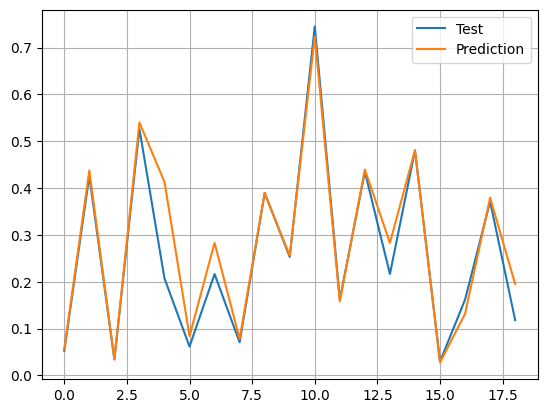

In [19]:
plt.plot(test, label='Test')
plt.plot(pred, label='Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
test = test.flatten()
pred = pred.flatten()

In [21]:
df = pd.DataFrame({'Test': test, 'Prediction': pred})
pd.options.display.float_format = '{:.2f}'.format
print(df)

    Test  Prediction
0   0.05        0.06
1   0.43        0.44
2   0.03        0.03
3   0.53        0.54
4   0.21        0.41
5   0.06        0.08
6   0.22        0.28
7   0.07        0.08
8   0.39        0.39
9   0.25        0.26
10  0.74        0.72
11  0.16        0.16
12  0.44        0.44
13  0.22        0.28
14  0.48        0.48
15  0.03        0.03
16  0.16        0.13
17  0.37        0.38
18  0.12        0.19


In [22]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import tree
#import graphviz 
import os

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, 
                            max_depth=3,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)
rf.fit(x_train, y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_3056\165335114.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)
c:\Program Files\Python38\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=3, max_features='auto', min_samples_leaf=4,
                      n_jobs=-1, random_state=0)

In [24]:
rf.estimators_[10] #ағаш саны

DecisionTreeRegressor(max_depth=3, max_features=1.0, min_samples_leaf=4,
                      random_state=626610453)

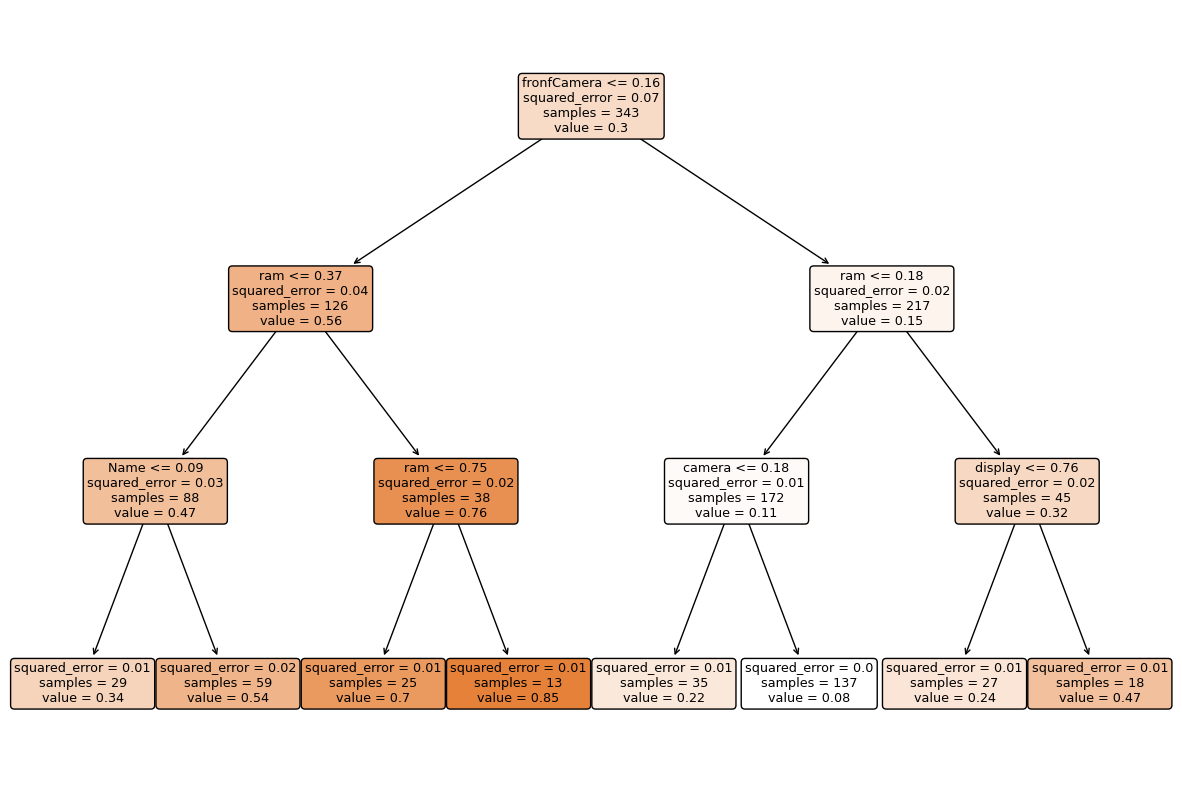

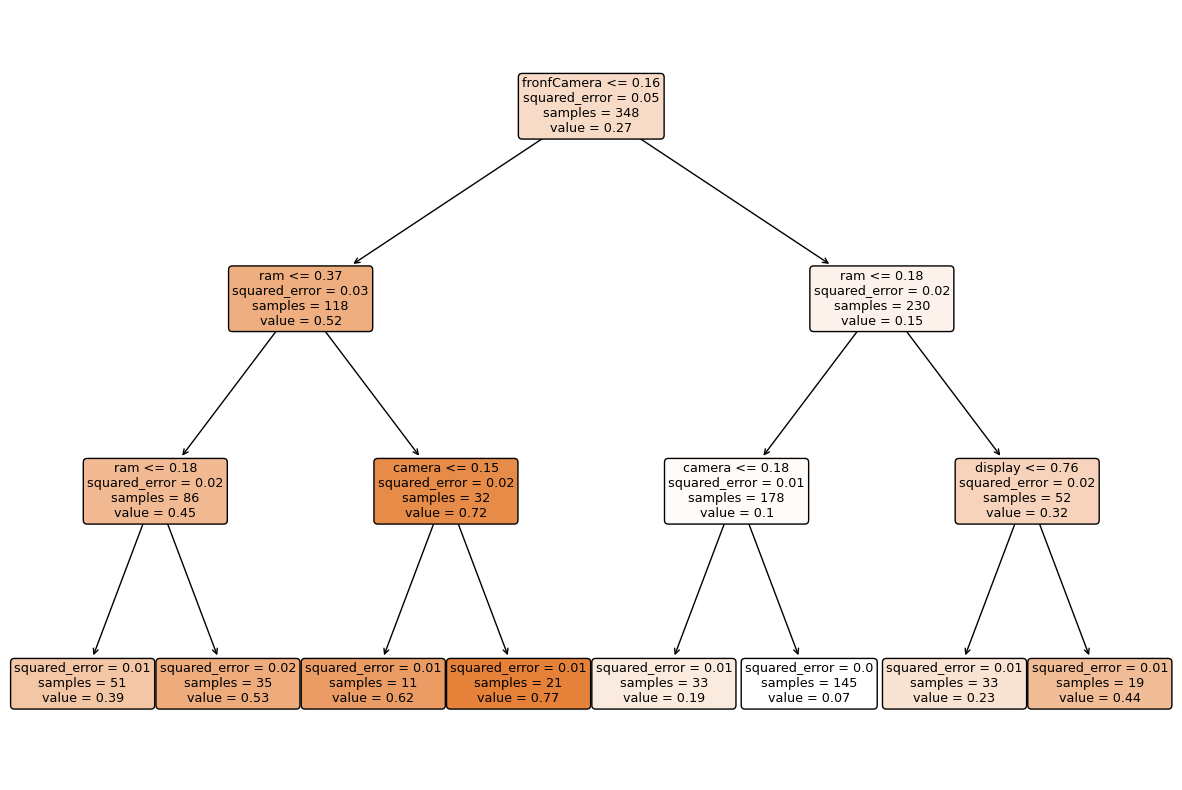

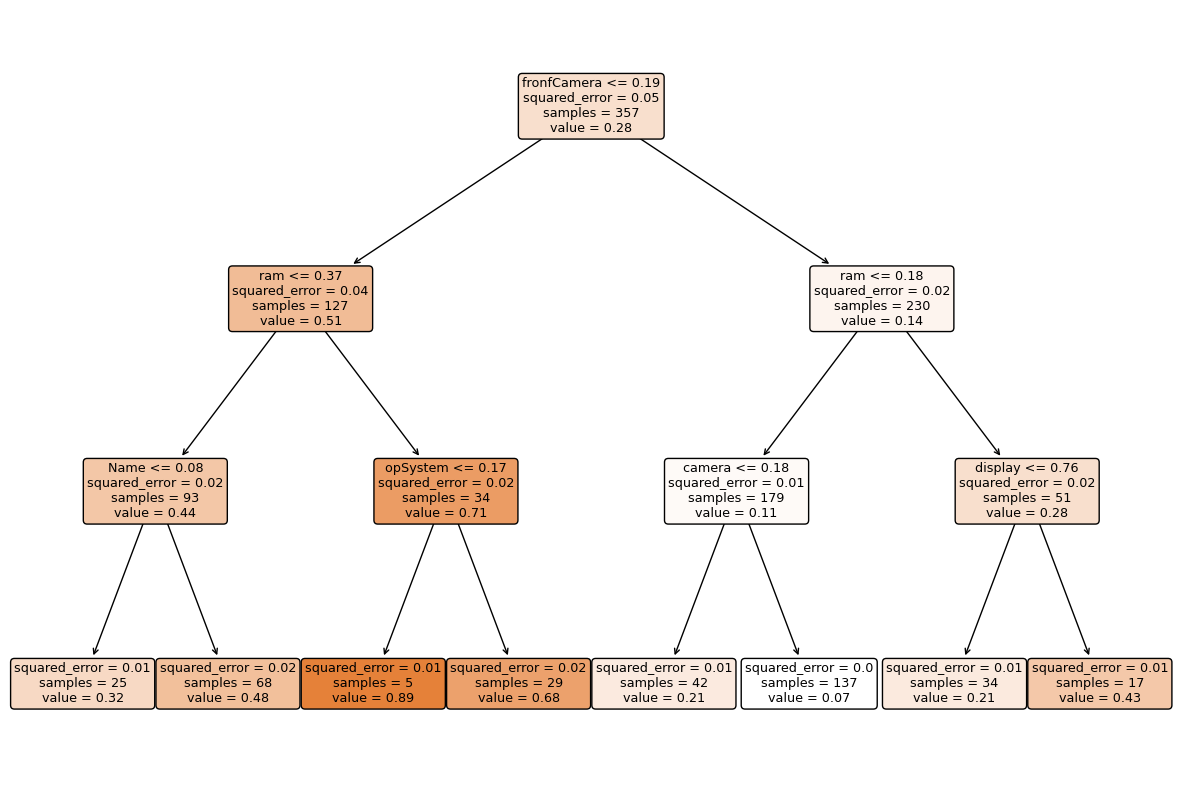

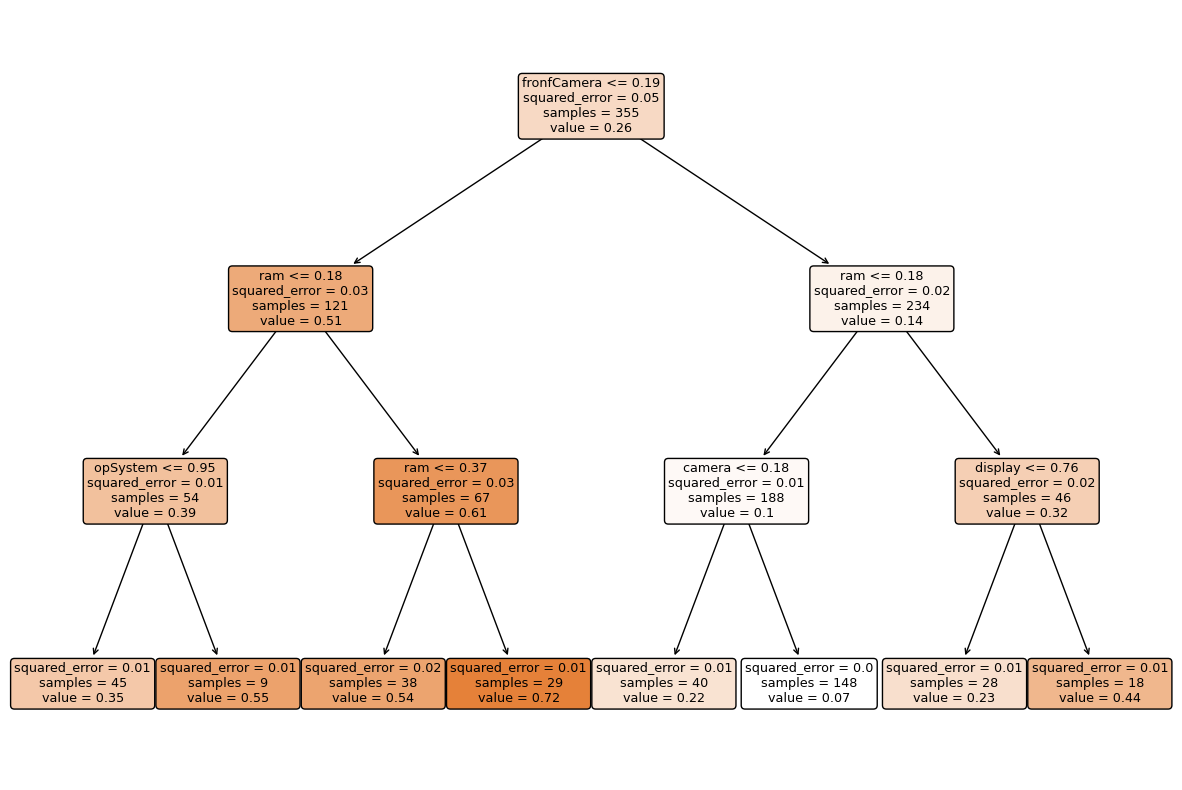

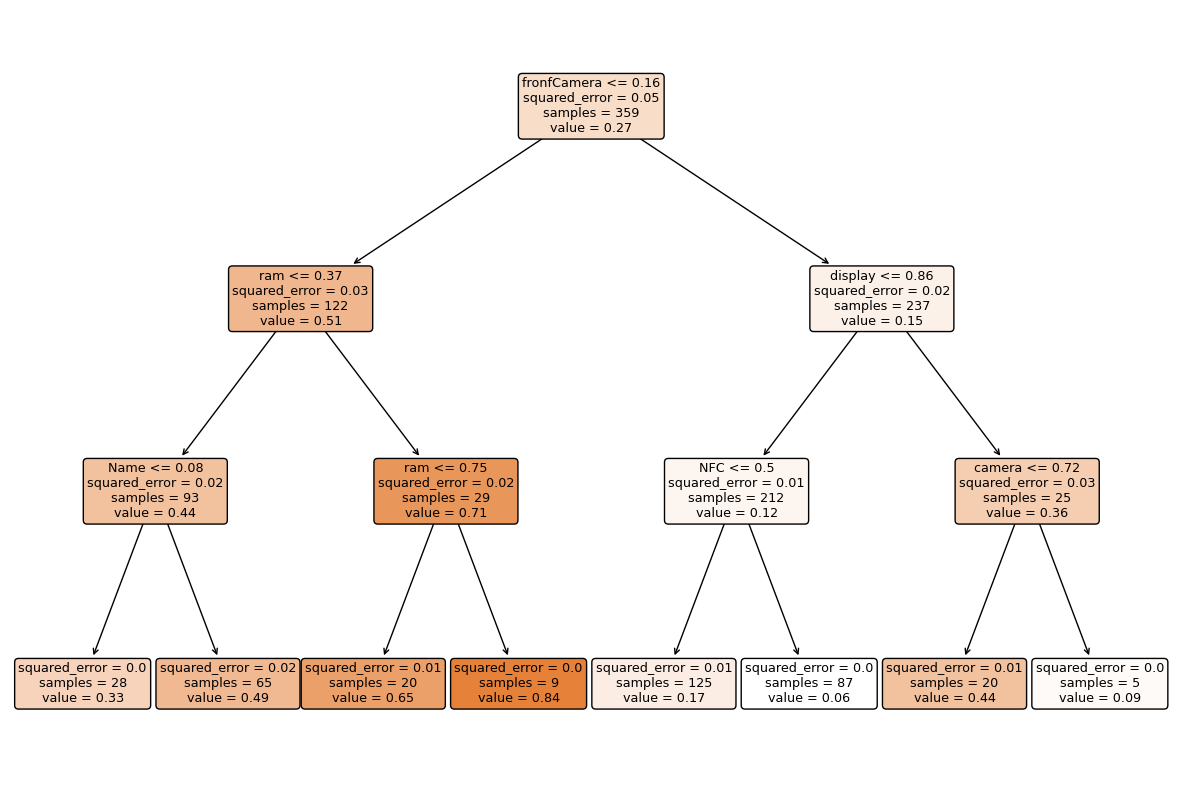

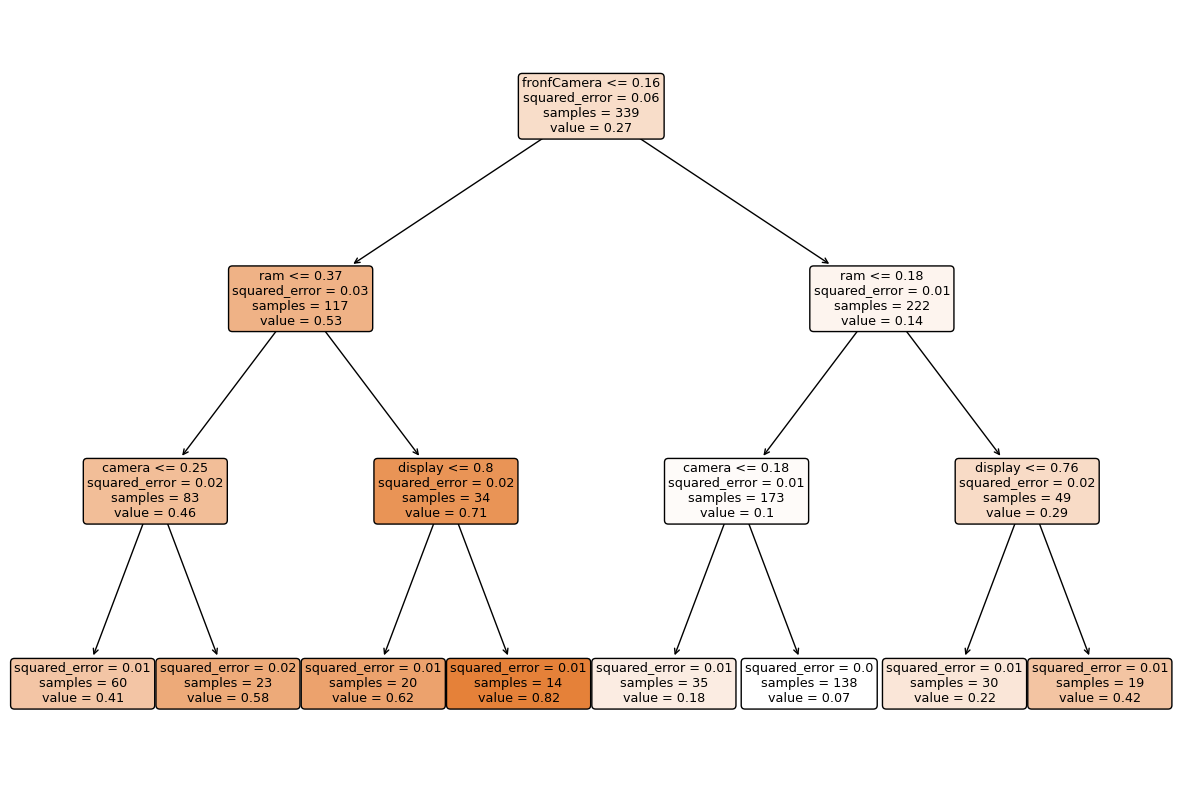

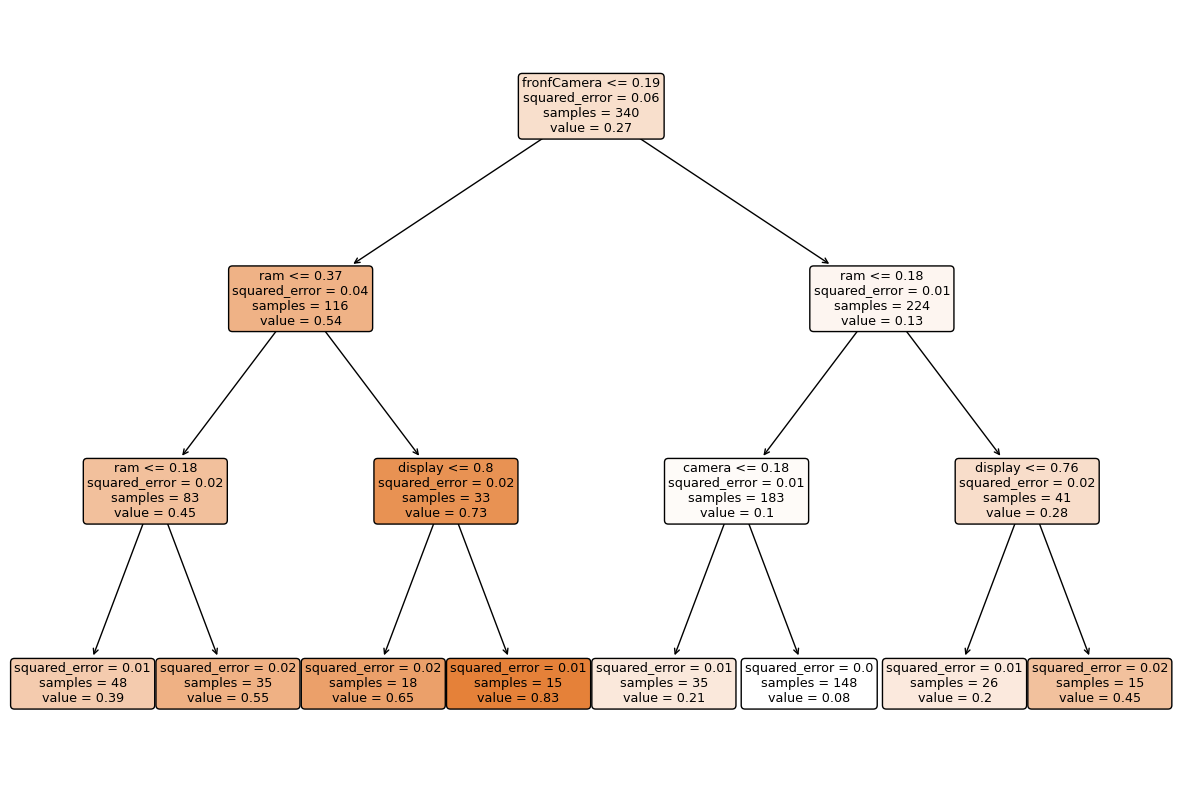

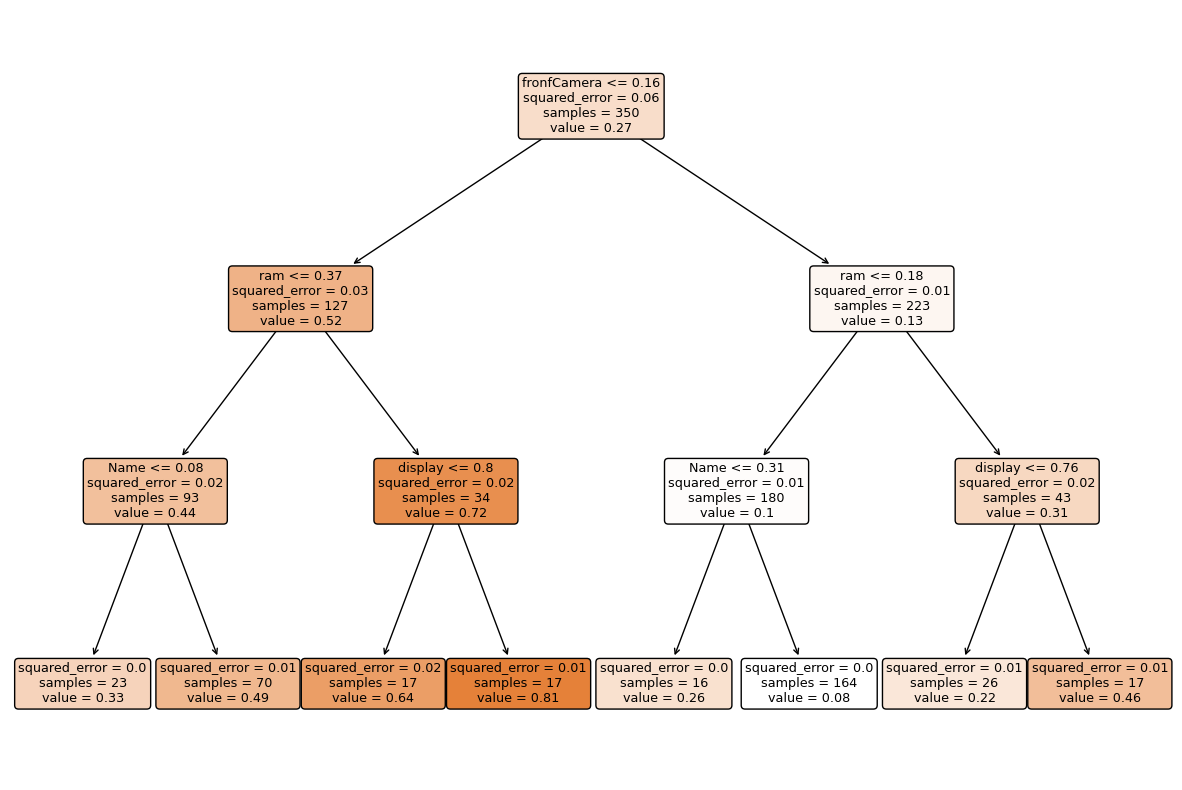

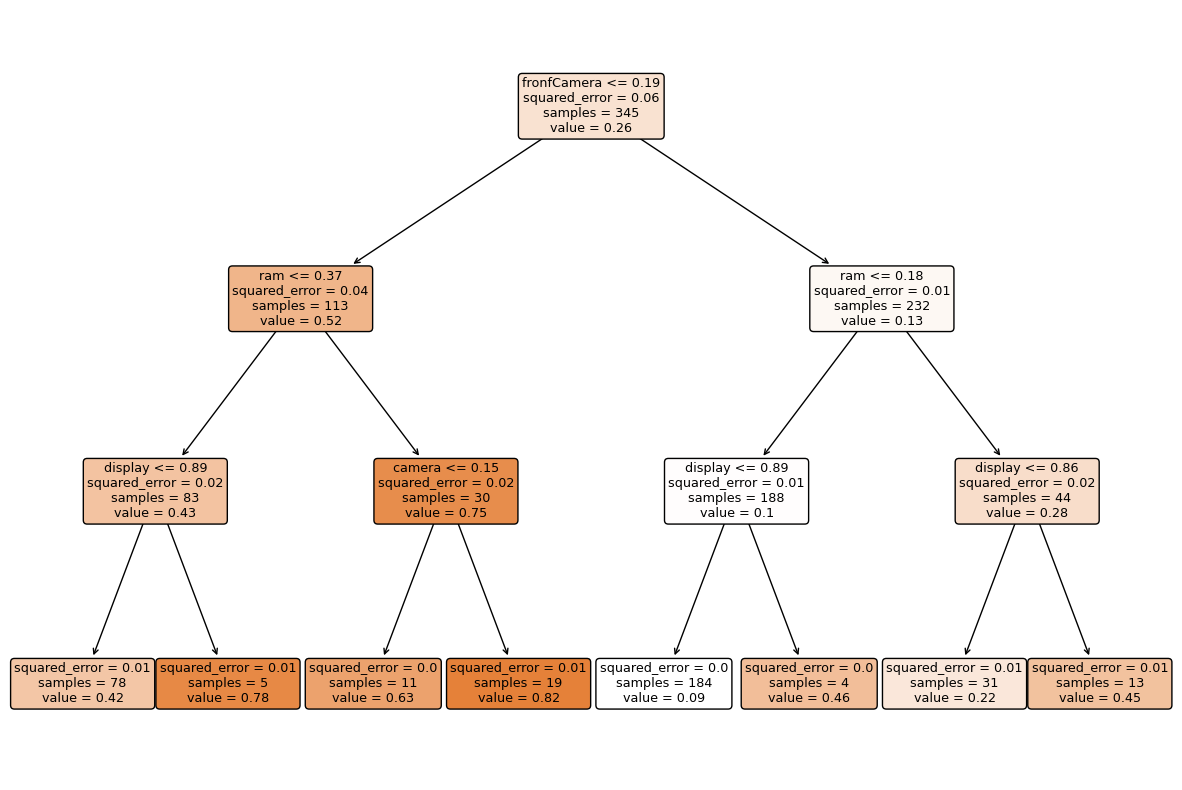

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


for i in range (9):
    fig = plt.figure(figsize=(15, 10))
    plot_tree(rf.estimators_[i], 
              feature_names=data.columns.values,
              precision=2, 
              filled=True, impurity=True, 
              rounded=True)
    fig.savefig('figure_name.png')
    i+=1